# Particle Swarm Optimization realization based on materials from lectures.

Function to be minimized:

$\text{F}(x, y) = (x^2 + y - 11) ^ 2  + (x + y ^ 2 - 7) ^ 2$

Solution by Stan Ilya Andreevich, 414

Required imports:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
from time import sleep
import pandas as pd

%matplotlib inline

First, let's analyze this function. A sum of squared functions is minimal, when each of components are minimal. Thus, if we change $X = x^2 + y$ and $Y = x + y^2$, we see, that in new coordinates minimum is at $X = 11$ and $Y = 7$.

If we then return to previous variables x and y and solve the system of equations, we find 4 posible minimums of a function:

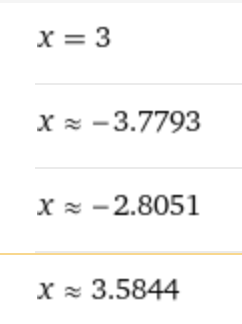

(Used wolphram alpha for solvation)

And $y = 11 - x^2$

F(3, 2) = 0, equally to other 3 options.

To start, methods to depict contour lines and swarm members:

In [2]:
def draw_configuration(dfs):
    # Creating a grid
    delta = 0.05
    width = np.arange(-8., 8., delta)
    hight = np.arange(-8., 8., delta)
    W, H = np.meshgrid(width, hight)

    # Calculating a function
    F = (W**2 + H - 11)**2 + (W + H**2 - 7)**2

    # Plotting with contouring
    fig, ax = plt.subplots()
    for df in dfs:
        plt.plot(df['x'], df['y'], "x", color='red')
    CS = ax.contour(W, H, F, levels=[5, 40, 90, 120, 180, 700, 1500], vmin=0., vmax=210.)
    ax.clabel(CS, inline=True, fontsize=10)
    ax.set_title('Contour lines of a function.')
    plt.show()

Now, we a ready to start implementing the algorithm.

Initialization of a population:

We will store a swarm in a list of DataFrames, where each dataframe represents a club.

Columns are: x, y, F(x, y), v_x, v_y, x_opt, y_opt, F_opt, where

x, y are current coordinates of a dot,

F(x, y) is a function value at a current location,

v_x, v_y are used in evolution,

x_opt, y_opt is one of dot's previous locations where the dot was closest to the optimal position,

F_opt is F(x_opt, y_opt)


In [3]:
N = 400 # size of a swarm
M = 10 # number of clubs

swarm = pd.DataFrame(data={
        'x': np.random.uniform(-8., 8., N),
        'y': np.random.uniform(-8., 8., N)
    }
)

swarm['F'] = swarm.apply(lambda x: (x['x']**2 + x['y'] - 11)**2 + (x['x'] + x['y']**2 - 7)**2, 1)
swarm['v_x'] = np.array([0] * N)
swarm['v_y'] = np.array([0] * N)
swarm['x_opt'] = swarm['x'].copy()
swarm['y_opt'] = swarm['y'].copy()
swarm['F_opt'] = swarm['F'].copy()


Divide swarm into clubs:

In [4]:
clubs = []

for _ in range(M):
    clubs.append(pd.DataFrame(columns=['x', 'y', 'F', 'v_x', 'v_y', 'x_opt', 'y_opt', 'F_opt']))

for i in range(N):
    for j in range(i, 1 + i):
        j %= M
        clubs[j].loc[len(clubs[j])] = swarm.loc[i]


An example of a club:

Starting configuration:

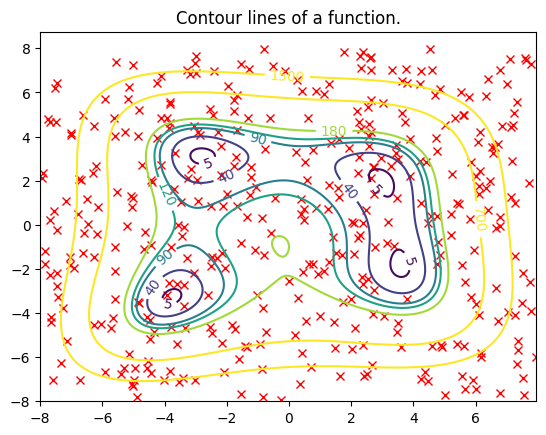

In [5]:
draw_configuration(clubs)

Evolution law:

In [6]:
# one step of evolution for each club (inplace)
def evolve(club, b1=0., b2=0., b3=0.3):
    # first - evolution, then, club evolution
    u1 = np.random.uniform(0, 1, 2)
    u2 = np.random.uniform(0, 1, 2)
    min_ind = np.argmin(club['F'])
    V_x = b1 * club['v_x'] + b2 * u1[0] * (club['x_opt'] - club['x']) + b3 * u2[0] * (club.loc[min_ind, 'x'] - club['x'])
    V_y = b1 * club['v_y'] + b2 * u1[1] * (club['y_opt'] - club['y']) + b3 * u2[1] * (club.loc[min_ind, 'y'] - club['y'])
    club['v_x'] = V_x
    club['v_y'] = V_y
    club['x'] += V_x
    club['y'] += V_y
    F = club.apply(lambda x: (x['x']**2 + x['y'] - 11)**2 + (x['x'] + x['y']**2 - 7)**2, 1)
    club['F'] = F

    # update optimums
    new_opt = F < club['F_opt']
    club['F_opt'] = new_opt * F + ~new_opt * club['F_opt']
    club['x_opt'] = new_opt * club['x'] + ~new_opt * club['x_opt']
    club['y_opt'] = new_opt * club['y'] + ~new_opt * club['y_opt']


In [7]:
# def clubs_evolve(clubs):
#     for club in clubs:
#         max_club = np.argmax(club['F'])
#         worst_member = club[club['F'] == np.amax(club['F'])]
#         worst_member.reset_index(inplace=True)

#         # add the worst to another club
#         for club in clubs:
#             if not np.any(club['x'] == worst_member.loc[0, 'x']) or not np.any(club['y'] == worst_member.loc[0, 'y']):
#                 club.loc[len(club)] = worst_member.loc[0]
#                 break
#         club.drop(index=worst_member.index[0])


Test

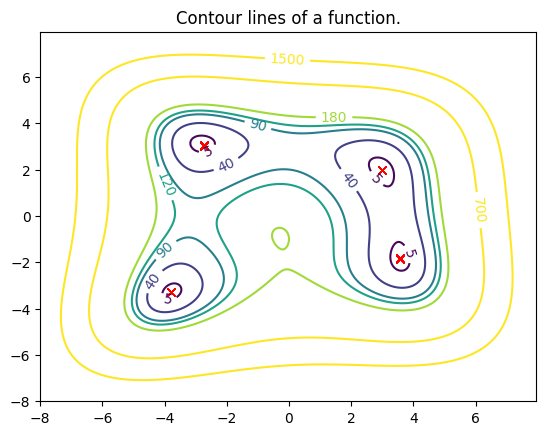

In [8]:
for step in range(100):
    clear_output(wait=True)
    for i in range(len(clubs)):
        evolve(clubs[i])
    draw_configuration(clubs)
    sleep(0.3)


Extract results:

In [10]:
for club in clubs:
    print(club.loc[0, ['x', 'y', 'F']])

x    3.000287
y    1.998912
F    0.000017
Name: 0, dtype: float64
x    2.999997e+00
y    2.000003e+00
F    2.636030e-10
Name: 0, dtype: float64
x    3.583601
y   -1.833070
F    0.003248
Name: 0, dtype: float64
x    3.000000e+00
y    2.000000e+00
F    2.740684e-12
Name: 0, dtype: float64
x   -3.779309e+00
y   -3.283185e+00
F    6.374853e-11
Name: 0, dtype: float64
x   -2.725565
y    3.075264
F    0.318042
Name: 0, dtype: float64
x   -2.736643
y    3.018452
F    0.633759
Name: 0, dtype: float64
x    3.000000e+00
y    2.000000e+00
F    1.392139e-13
Name: 0, dtype: float64
x    3.584428e+00
y   -1.848126e+00
F    2.479439e-11
Name: 0, dtype: float64
x    2.999414
y    2.002143
F    0.000066
Name: 0, dtype: float64


As we can see, all of the possible solutions were found.